<a href="https://colab.research.google.com/github/Zelkova46/ML-terapan/blob/main/submisi1_MLterapan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Nama: Muhammad Imam Ariq Sya'bana
- Email: imambritish@gmail.com
- Id Dicoding: Muhammad Imam Ariq Sya'bana

## Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from datetime import datetime
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import minmax_scale
from tensorflow.keras.utils import plot_model
import seaborn as sns
import os

## Data Understanding

Data yang digunakan pada submisi kali ini adalah data yang didapat dari public datasets yang diupload di kaggle.com. Tautan untuk datasets tersebut adalah https://www.kaggle.com/datasets/htagholdings/property-sales?select=raw_sales.csv

Data tersebut merupakan data time series yang memiliki keterangan atribut meliputi harga rumah,  jumlah bedrooms, postcode lokasi rumah, tipe properti, dan yang membuat data ini menjadi tipe timeseries adalah adanya atribut datesold yang memberitahu keterangan waktu untuk masing-masing data. Untuk atribut propertyType data berjenis categorical. Data pada atribut datesold berjenis datetime, dan sisanya adalah numerik.  

Dataset tersebut berjumlah 29580 data. Satu hal yang perlu diingat pada dataset yang digunakan untuk submisi kali ini adalah data yang disediakan bukan data yang dicatat persatuan waktu misal per hari atau per minggu, melainkan data tersebut tidak memiliki pola waktu bahkan saat sudah diurutkan dari yang terdahulu ke yang paling baru.  

## Data Loading

memasukkan dataset yang sebelumnya telah diupload di drive

In [ ]:
house_price_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bangkit/Dicoding optional courses/ML Terapan/Submisi 1/raw_sales.csv",
                 parse_dates = ["datesold"],
                 index_col = ["datesold"]) #Untuk time series datasets, maka index masing-masing data pada data ini adalah "datesold"


house_price_df.head()

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


In [ ]:
house_price_df.tail()

,postcode,price,propertyType,bedrooms
datesold,,,,
2019-07-25,2900,500000,unit,3
2019-07-25,2612,560000,unit,2
2019-07-26,2912,464950,unit,2
2019-07-26,2601,589000,unit,2
2019-07-26,2612,775000,unit,2


In [ ]:
housing_price_df = pd.DataFrame(house_price_df['price'])
housing_price_df

,price
datesold,
2007-02-07,525000
2007-02-27,290000
2007-03-07,328000
2007-03-09,380000
2007-03-21,310000
...,...
2019-07-25,500000
2019-07-25,560000
2019-07-26,464950


In [ ]:
# menampilkan jumlah data
len(housing_price_df)

29580

## Exploratory Data Analysis

Mengetahui jenis variable pada dataset

In [ ]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29580 entries, 2007-02-07 to 2019-07-26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   postcode      29580 non-null  int64 
 1   price         29580 non-null  int64 
 2   propertyType  29580 non-null  object
 3   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


Distribusi nilai setiap variabel dalam dataset

In [ ]:
house_price_df.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


mengetahui missing value

In [ ]:
# Memeriksa apakah terdapat attribut yang tidak memiliki value
missing_value = house_price_df.isna().any().any()
missing_value

False

Explorasi atribut numerical dan categorical

In [ ]:
numerical_features = ['price', 'bedrooms']
categorical_features = ["propertyType"]

visualisasi fitur categorical 'propertyType'


       jumlah sampel  persentase
house          24552        83.0
unit            5028        17.0


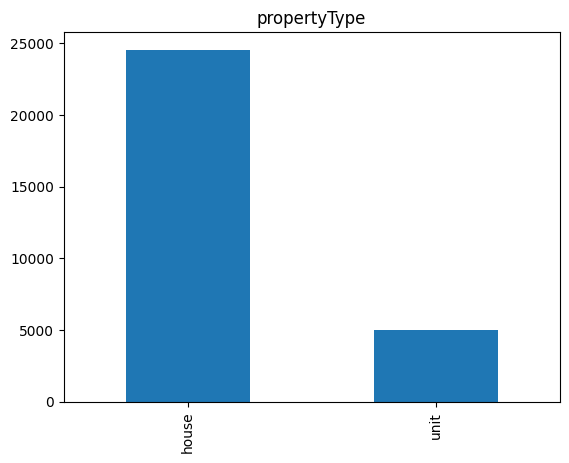

In [ ]:
feature = categorical_features[0]
count = house_price_df[feature].value_counts()
percent = 100*house_price_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

visualisasi fitur Numerical

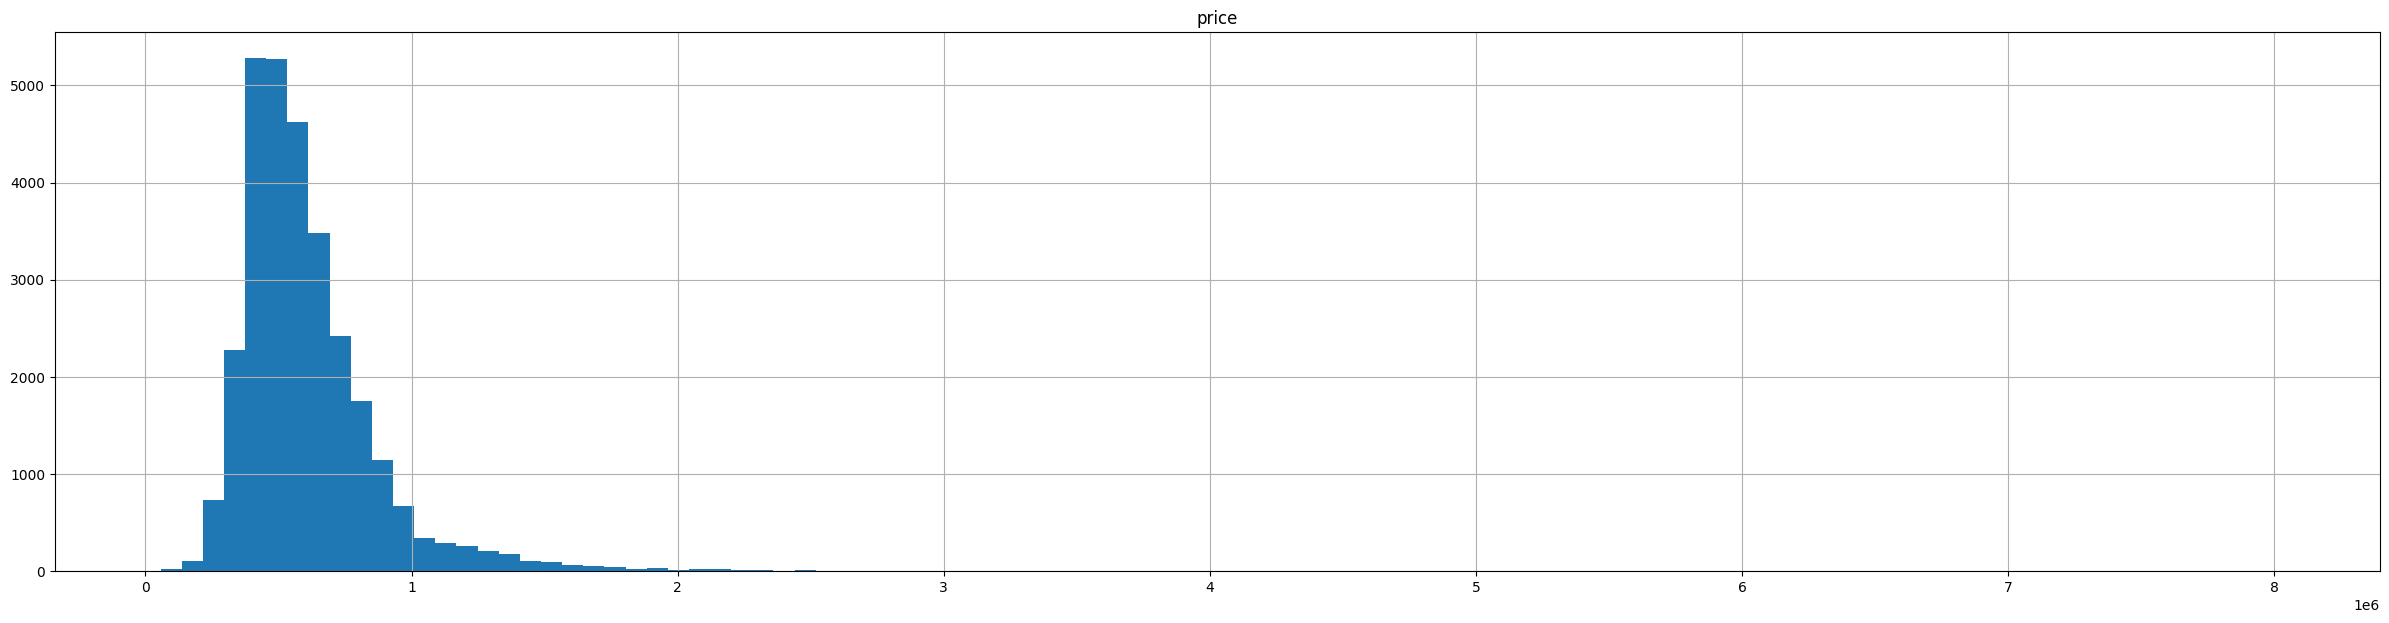

In [ ]:
house_price_df["price"].hist(bins=100, figsize = (30,7))
plt.title("price")
plt.show()

visualisasi histogram atribut jumlah bedrooms

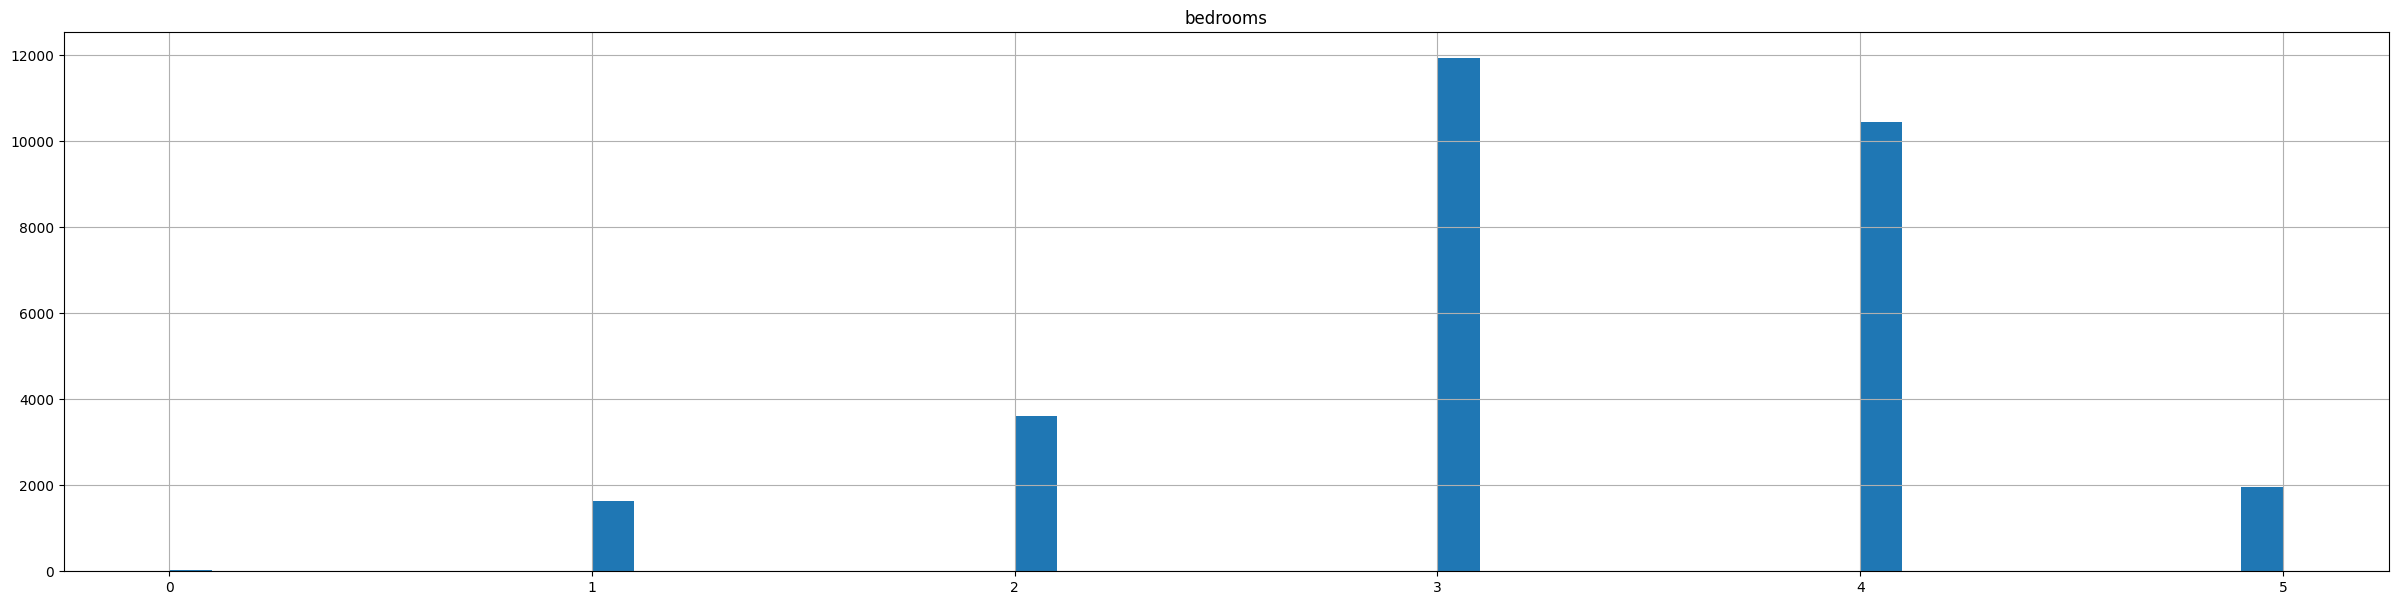

In [ ]:
house_price_df["bedrooms"].hist(bins=50, figsize = (30,7))
plt.title("bedrooms")
plt.show()

Dari visualisasi atribut jumlah bedrooms dapat disimpulkan bahwa rumah dengan 3 kamar tidur paling banyak dijual dibanding dengan rumah dengan jumlah kamar tidur 0,1,2,4, dan 5

## Exploratory Data Analysis - Multivariate Analysis

Melakukan cek rata-rata harga rumah terhadap fitur categorical untuk mengetahui pengaruh fitur kategori terhadap harga.

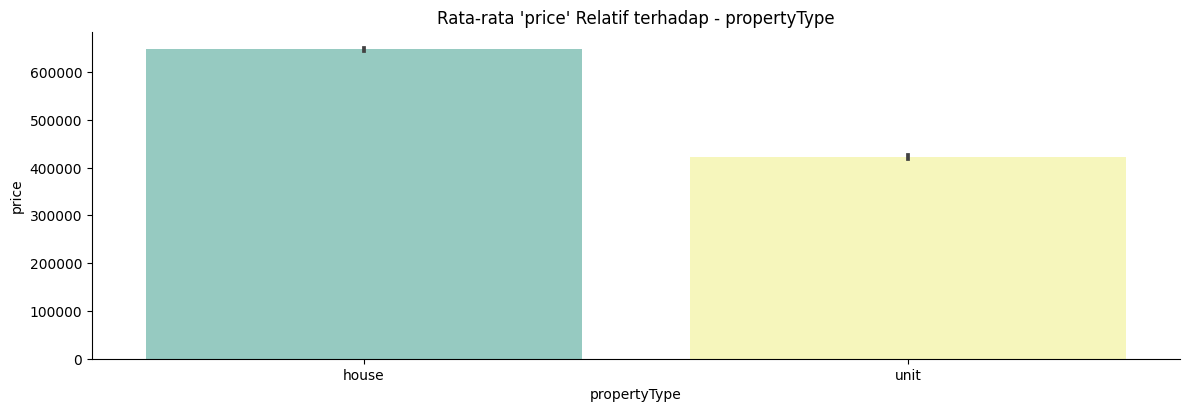

In [ ]:
cat_features = house_price_df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=house_price_df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Fitur 'propertyType' menunjukkan bahwa tipe 'unit' memiliki harga rerata yang lebih rendah dari pada tipe 'house' yang memiliki harga yang lebih tinggi. Perbedaan rerate harga unit hanya tertinggal sekitar kurang dari 30% dari harga rerate house. Hal tersebut juga mungkin bisa disebabkan oleh lokasi dari tipe unit yang rata-rata memiliki lokasi yang sangat berbeda dibandingkan dengan tipe house. Hal ini berarti bahwa fitur 'propertyType' memiliki pengaruh yang rendah terhadap harga.

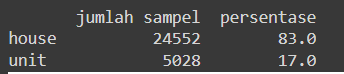


Ditambah jika kita melihat sebaran data untuk tipe unit dan tipe house didapat bahwa jumlah data rumah dengan tipe unit hanya 17% dari keseluruhan data, sedangkan rumah dengan tipe house memiliki 83%. Ketidakseimbangan distribusi data ini membuat atribut 'propertyType' tidak dapat digunakan untuk menebak prediksi harga rumah karena dianggap tidak akan relevan karena distribusi data yang tidak seimbang. Maka dari itu selanjutnya atribut tipe property tidak akan digunakan.

Numerical Features

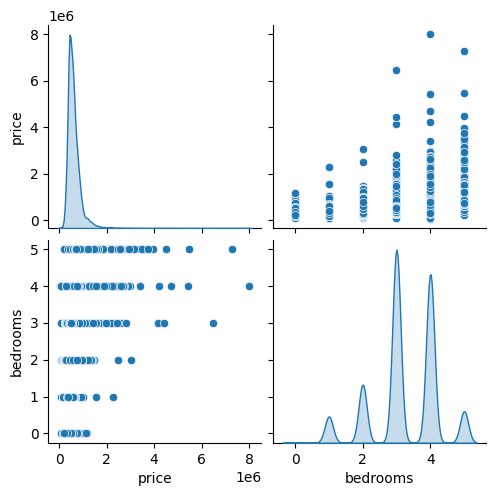

In [ ]:
columns_to_plot = ['price', 'bedrooms']
selected_df = house_price_df[columns_to_plot]
sns.pairplot(selected_df, diag_kind='kde')
plt.show()


Dari visualisasi histogram perbandingan antara price dengan bedrooms, kita bisa mengetahui bahwa peningkatan harga diiringi dengan peningkatan jumlah bedroom. Walaupun terdapat pula jumlah bedrooms yang tinggi tetapi memiliki price yang paling rendah, tetapi pola yang bisa dipastikan adalah tidak mungkin jumlah bedrooms yang rendah memiliki harga yang tinggi

<ipython-input-15-74bfc46b7964>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = house_price_df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

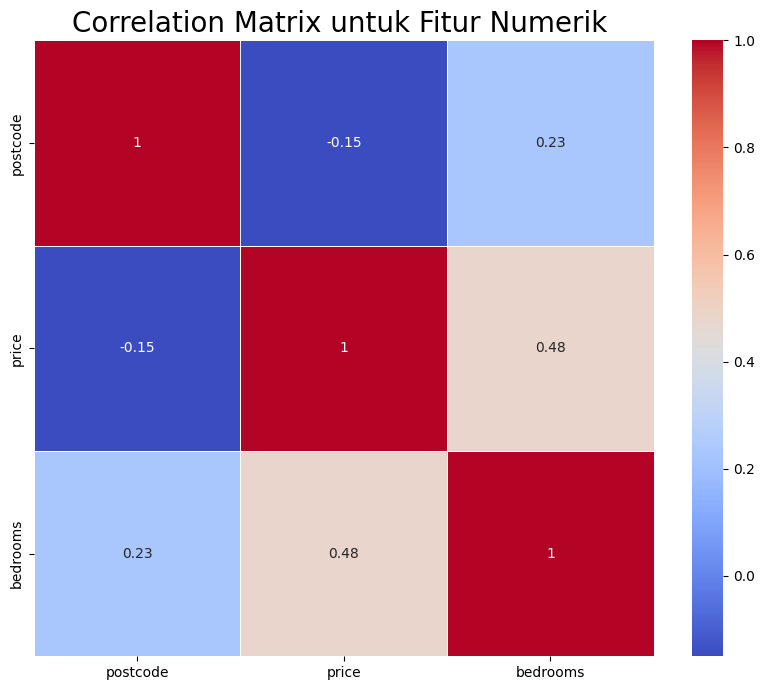

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = house_price_df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Data scatter plot yang sebelumnya mencerminkan nilai korelasi antara atribut price dengan jumlah bedrooms. Karena terdapat sejumlah data yang tidak konsisten, dalam arti ada data yang jumlah bedrooms yang tinggi tetapi memiliki price yang tinggi dan ada juga rendah. Dengan begitu nilai korelasi tidak mendekati positif satu, hanya bernilai 0.48   

## Data Preparation

Selanjutnya adalah usaha untuk membuat data menjadi lebih menjadi regular dengan cara menghilangkan beberapa data yang tidak sesuai pola.

Metode dalam membuat data yang tidak regular menjadi regular adalah dengan menghitung nilai mean pada data-data yang terletak dalam rentang waktu yang ditentukan.

In [ ]:
from sklearn.preprocessing import LabelEncoder
house_price_df = house_price_df.resample('w').mean()
house_price_df.head(20)

house_price_df

<ipython-input-16-8c8b5c0daa9d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  house_price_df = house_price_df.resample('w').mean()


,postcode,price,bedrooms
datesold,,,
2007-02-11,2607.000000,525000.000000,4.000000
2007-02-18,NaN,NaN,NaN
2007-02-25,NaN,NaN,NaN
2007-03-04,2906.000000,290000.000000,3.000000
2007-03-11,2905.000000,354000.000000,3.500000
...,...,...,...
2019-06-30,2703.730769,719382.692308,3.576923
2019-07-07,2726.360000,570675.640000,2.990000
2019-07-14,2742.622222,594121.111111,2.955556


menghilangkan data harga mingguan yang ternyata menjadi NaN

In [ ]:
house_price_df = house_price_df.dropna()
len(house_price_df)

631

In [ ]:
house_price_df.head()

,postcode,price,bedrooms
datesold,,,
2007-02-11,2607.0,525000.0,4.0
2007-03-04,2906.0,290000.0,3.0
2007-03-11,2905.0,354000.0,3.5
2007-03-25,2906.0,310000.0,3.0
2007-04-08,2905.0,465000.0,4.0


data harga setelah data dirubah dari data iregular menjadi data regular perbulannya dengan cara menghitung mean dari price yang ada dibulan yang sama

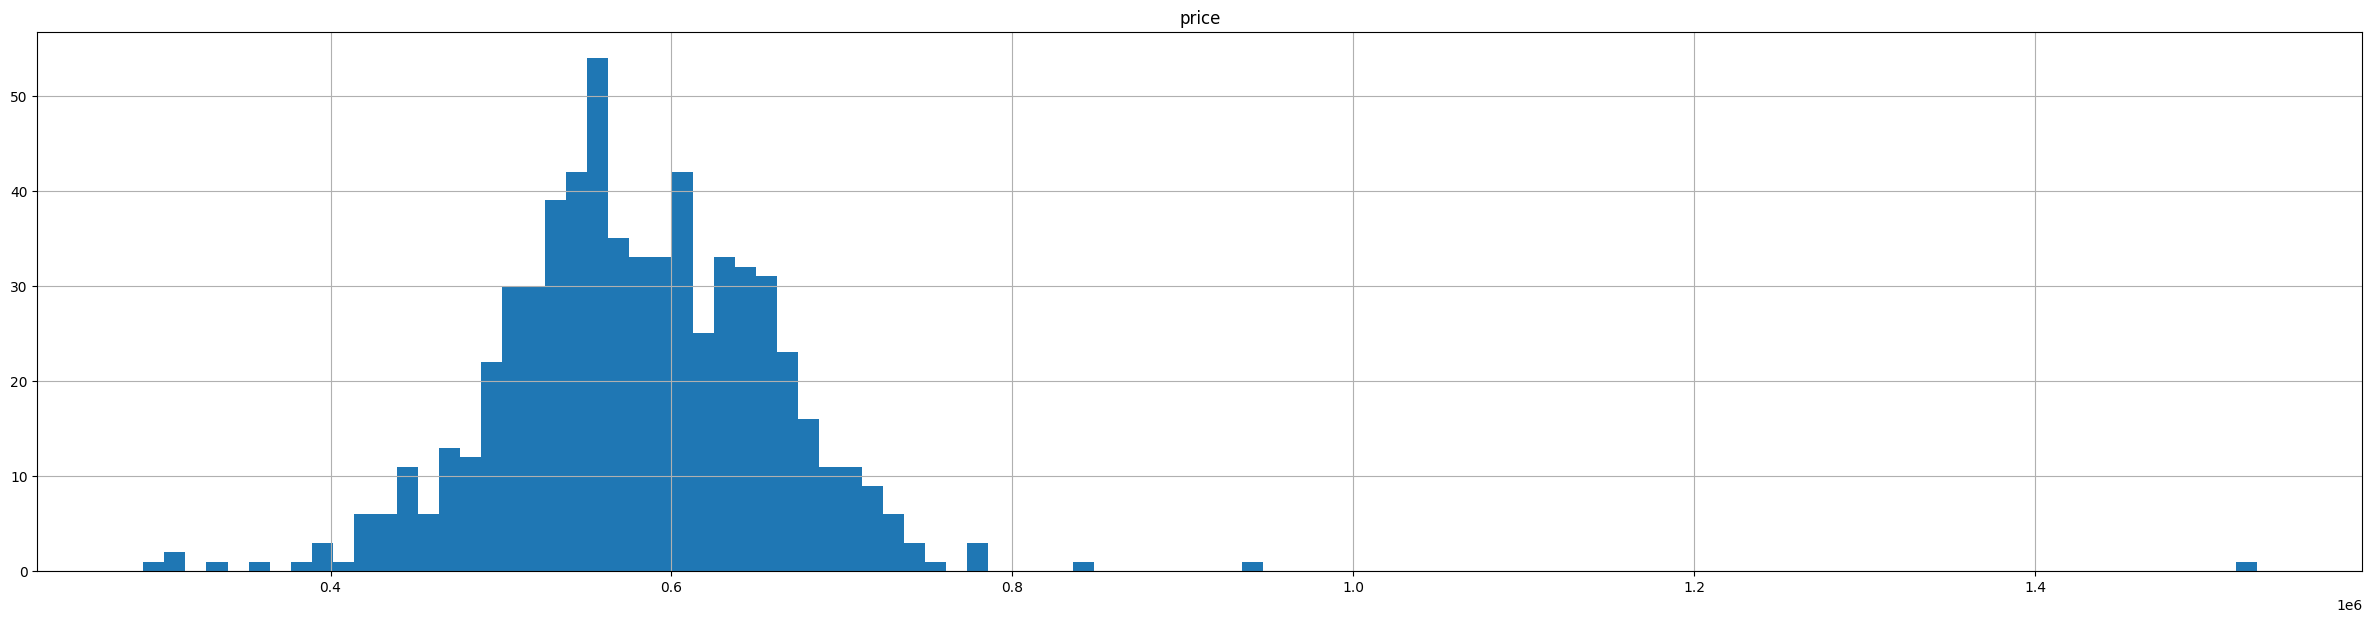

In [ ]:
house_price_df["price"].hist(bins=100, figsize = (30,7))
plt.title("price")
plt.show()

memvisualisasikan data yang sudah regular dengan atribut hanya price dan jumlah bedroom

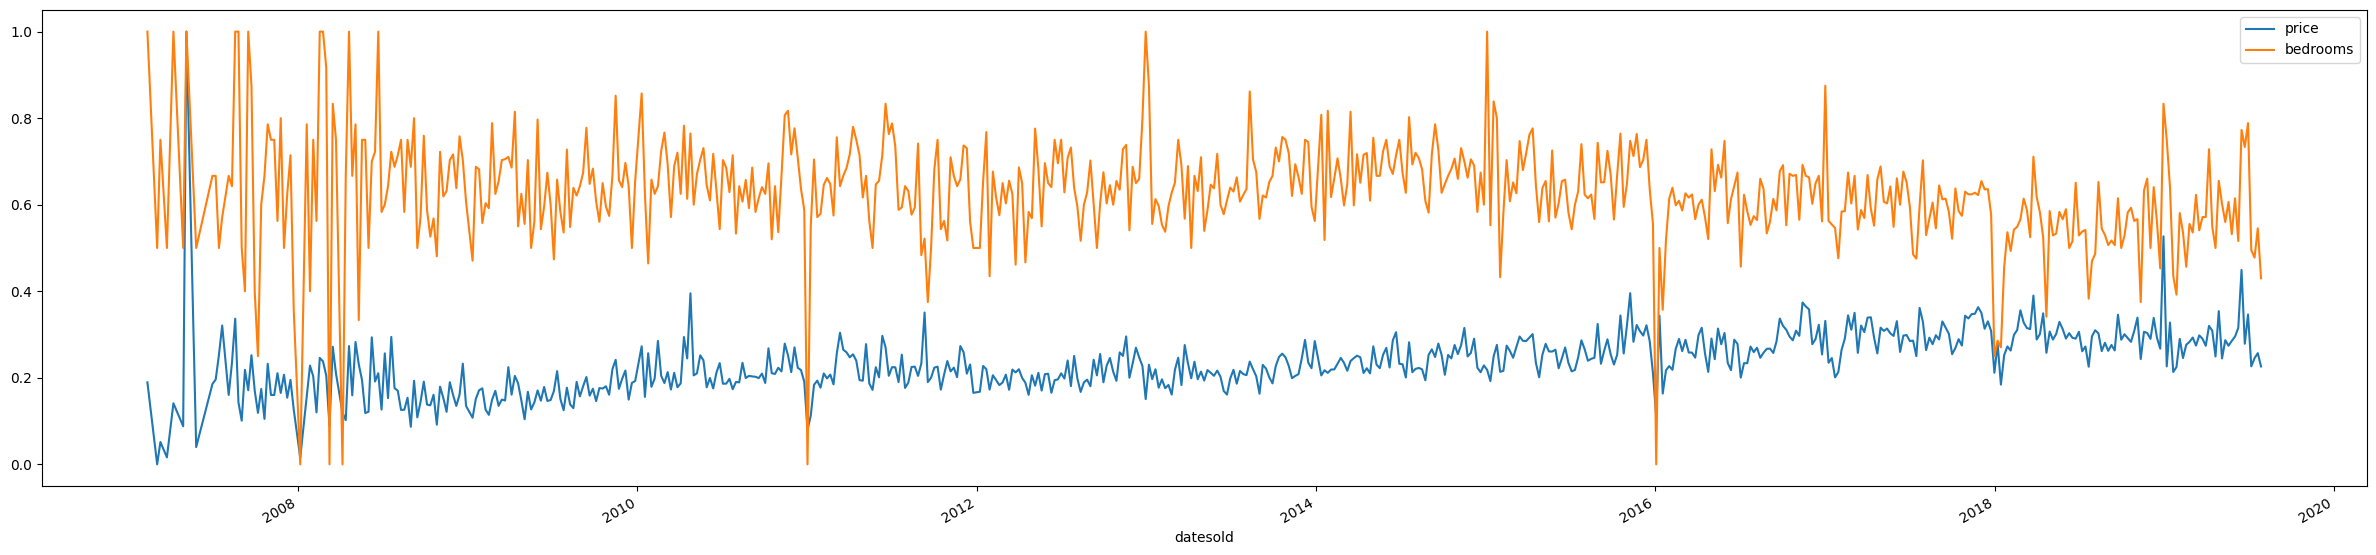

In [ ]:
# memvisualisasikan harga rumah disertai dengan jumlah bedrooms dari bulan ke bulan setiap tahun
# Karena harga dan jumlah bedrooms memiliki nilai berbeda, maka untuk visualisasi akan diskala antara 0 dan 1

scaled_house_price_df = pd.DataFrame(minmax_scale(house_price_df[["price", "bedrooms"]]),
                                     columns=['price', 'bedrooms'],
                                     index=house_price_df.index)
scaled_house_price_df.plot(figsize=(30, 7));

Karena ingin membuat model train dengan data time series kita akan membuat dataset terbagi menjadi windowed untuk dependent variable (x) dan Horizon untuk independent variable (y)

Untuk dapat membuat data timeseries dapat dimasukkan ke dalam machine learning supervised learning, diperlikan metode windowing. window dari jangka waktu dimasa lalu digunakan untuk menebak masa depan (horizon)

In [ ]:
HORIZON = 1 # menebak price rata-rata pada 1 minggu kedepannya
WINDOW_SIZE = 8 #menebak price 2 bulan sebelumnya

membuat windowed data

In [ ]:
# hanya melibatkan window harga dan jumlah bedrooms sebagai independent variable dn price sebagai dependent variable
house_prices_windowed = house_price_df.drop('postcode', axis=1).copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  house_prices_windowed[f"Price+{i+1}"] = house_prices_windowed["price"].shift(periods=i+1)
house_prices_windowed.head(10)


,price,bedrooms,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,Price+8
datesold,,,,,,,,,,
2007-02-11,5.250000e+05,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-04,2.900000e+05,3.000000,5.250000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-11,3.540000e+05,3.500000,2.900000e+05,525000.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-25,3.100000e+05,3.000000,3.540000e+05,290000.0,525000.0,NaN,NaN,NaN,NaN,NaN
2007-04-08,4.650000e+05,4.000000,3.100000e+05,354000.0,290000.0,525000.0,NaN,NaN,NaN,NaN
2007-04-29,3.990000e+05,3.000000,4.650000e+05,310000.0,354000.0,290000.0,525000.0,NaN,NaN,NaN
2007-05-06,1.530000e+06,4.000000,3.990000e+05,465000.0,310000.0,354000.0,290000.0,525000.0,NaN,NaN
2007-05-27,3.395000e+05,3.000000,1.530000e+06,399000.0,465000.0,310000.0,354000.0,290000.0,525000.0,NaN
2007-07-01,5.203333e+05,3.333333,3.395000e+05,1530000.0,399000.0,465000.0,310000.0,354000.0,290000.0,525000.0


Setelah data menjadi windowed selanjutnya dilakukan pembagian features dan label.

Untuk feature berisi oleh window harga pada beberapa waktu kebelakang sesuai dengan nilai WINDOW_SIZE yang didefinisikan ditambah dengan jumlah bedrooms karena ini merupakan multivariate time series. Lalu, untuk label diisi oleh keterangan price untuk beberapa waktu kedepan sesuai dengan nilai HORIZON yang didefinisikan sebelumnya.

menghilangkan NaN values, hanya menggunakan data windowed yang full dalam hal windowed-nya tidak memilki NaN values

In [ ]:
X = house_prices_windowed.dropna().drop("price", axis=1).astype(np.float32)
y = house_prices_windowed.dropna()["price"].astype(np.float32)
X.head()

,bedrooms,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,Price+8
datesold,,,,,,,,,
2007-07-01,3.333333,339500.00000,1.530000e+06,3.990000e+05,4.650000e+05,310000.0,354000.0,290000.0,525000.0
2007-07-08,3.333333,520333.34375,3.395000e+05,1.530000e+06,3.990000e+05,465000.0,310000.0,354000.0,290000.0
2007-07-15,3.000000,533000.00000,5.203333e+05,3.395000e+05,1.530000e+06,399000.0,465000.0,310000.0,354000.0
2007-07-22,3.142857,603750.00000,5.330000e+05,5.203333e+05,3.395000e+05,1530000.0,399000.0,465000.0,310000.0
2007-08-05,3.333333,687714.31250,6.037500e+05,5.330000e+05,5.203333e+05,339500.0,1530000.0,399000.0,465000.0


In [ ]:
y.head()

datesold
2007-07-01    520333.34375
2007-07-08    533000.00000
2007-07-15    603750.00000
2007-07-22    687714.31250
2007-08-05    488833.34375
Name: price, dtype: float32

split train dan test sets dengan proporsi train 80% dan test 20%

In [ ]:
split_size = int(len(X) * 0.8)
train_windows, train_labels = X[:split_size], y[:split_size]
test_windows, test_labels = X[split_size:], y[split_size:]
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(498, 498, 125, 125)

## Model Development

membuat model pertama dengan menggunakan Convolution Neural Network

In [ ]:
tf.random.set_seed(46)

#membuat model convolution
model_conv = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=64, kernel_size=5, padding="causal", activation="relu"),
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Conv1D(filters=256, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_convolution")


In [ ]:

# Compile model
model_conv.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001))

# Fit model
history = model_conv.fit(train_windows,
            train_labels,
            batch_size=64,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels)
            )

Epoch 1/100
8/8 [==============================] - 2s 35ms/step - loss: 558214.6875 - val_loss: 645918.5000
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 546533.4375 - val_loss: 631575.3125
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 533738.7500 - val_loss: 615521.8125
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 518957.2500 - val_loss: 596121.7500
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 500580.1562 - val_loss: 571328.0625
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 476999.1250 - val_loss: 539473.1250
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 446721.8438 - val_loss: 498513.1562
Epoch 8/100
8/8 [==============================] - 0s 10ms/step - loss: 407390.0000 - val_loss: 444705.6562
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 355793.8750 - val_loss: 374151.8125
Epoch 10/100
8/8 [=============

 informasi mengenai evaluasi model pada tahap pelatihan seperti akurasi atau grafik loss untuk menyajikan gambaran tentang bagaimana performa model tersebut selama pelatihan serta penjelasan fungsi setiap parameter

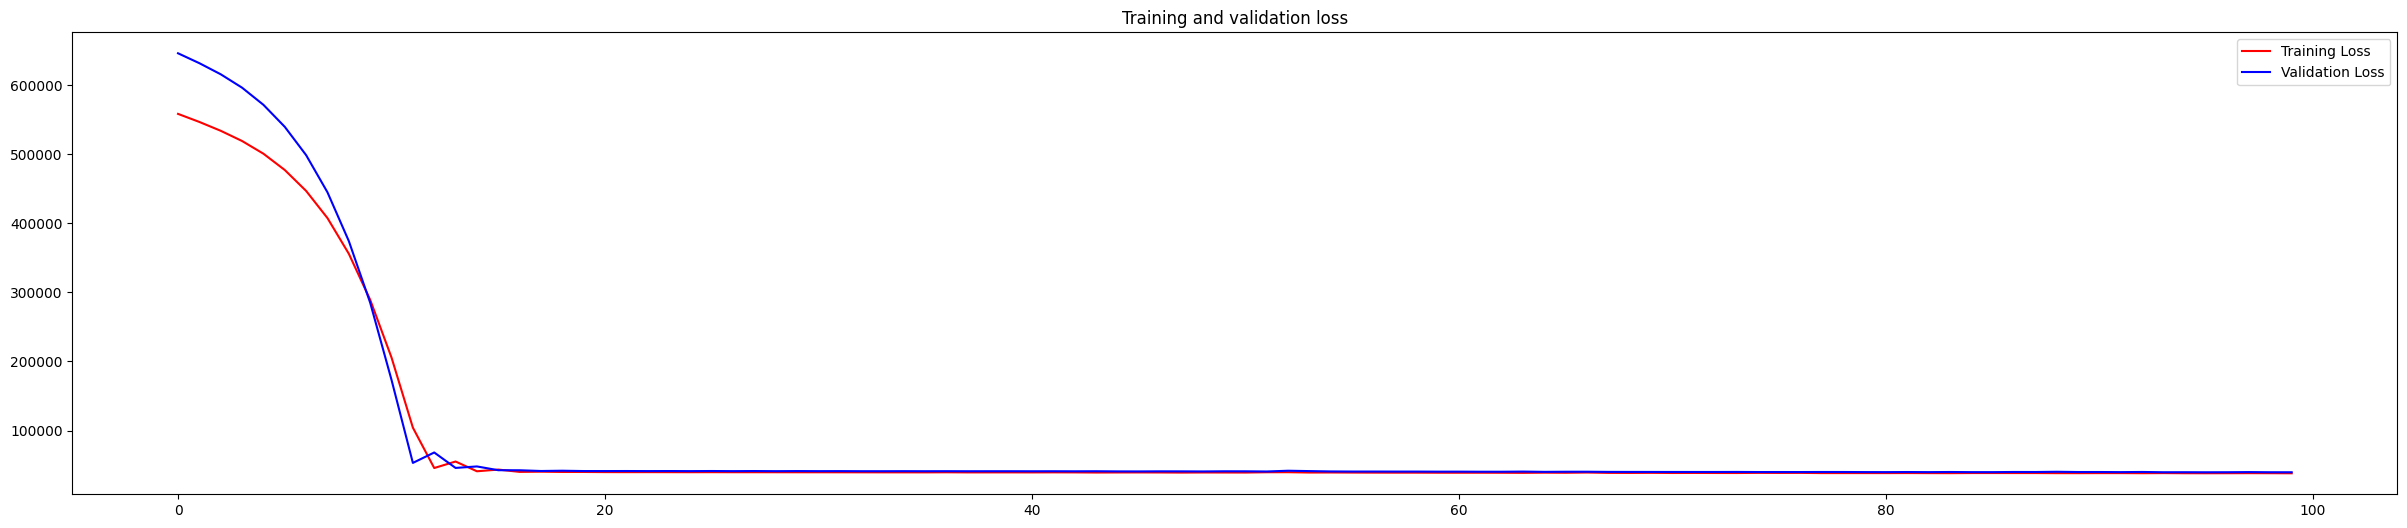

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))


plt.figure(figsize=(30, 6))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_conv.summary()

Model: "model_convolution"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 9)              0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 64)             2944      
                                                                 
 conv1d_4 (Conv1D)           (None, 1, 128)            41088     
                                                                 
 conv1d_5 (Conv1D)           (None, 1, 256)            164096    
                                                                 
 dense_1 (Dense)             (None, 1, 1)              257       
                                                                 
Total params: 208,385
Trainable params: 208,385
Non-trainable params: 0
_________________________________________________________________


Untuk mendapatkan hasil parameter evaluasi diperlukan uji model untuk membuat prediksi menggunakan data test.

Mirip seperti yang dilakukan pada saat mengevaluasi performa model tetapi kali ini dapat mengukur dengan menggunakan beberapa metrics tidak hanya satu saja

In [ ]:
# membuat prediksi
model_conv_prediksi = model_conv.predict(test_windows)

model_conv_prediksi = tf.squeeze(model_conv_prediksi)

model_conv_prediksi

4/4 [==============================] - 0s 37ms/step


<tf.Tensor: shape=(125,), dtype=float32, numpy=
array([652919.75, 643187.9 , 666402.1 , 668554.9 , 681791.44, 693750.4 ,
       677617.8 , 668316.06, 668283.9 , 670251.6 , 676904.5 , 673745.7 ,
       665488.4 , 673621.2 , 657343.4 , 669217.94, 660098.56, 658577.06,
       657990.4 , 640419.4 , 664573.94, 659751.75, 661334.7 , 663111.3 ,
       645133.8 , 657573.3 , 656849.06, 667695.06, 666136.75, 664796.25,
       654860.56, 650617.  , 651116.4 , 647129.9 , 664722.44, 661714.3 ,
       676587.06, 686593.1 , 697421.4 , 712472.25, 709622.44, 715307.8 ,
       702613.94, 672476.94, 671020.1 , 622691.56, 625139.06, 615447.75,
       607130.75, 620709.4 , 613763.  , 647902.56, 656469.5 , 673119.  ,
       678691.6 , 697574.06, 691169.75, 697964.56, 698366.44, 673446.6 ,
       684456.06, 664726.44, 670858.6 , 673297.44, 666360.6 , 669561.94,
       665114.75, 665097.75, 665345.56, 667693.75, 654073.8 , 651073.06,
       627593.5 , 638384.3 , 640316.7 , 644314.56, 640400.8 , 634726.06,
   

Menyusun fungsi untuk tahap evaluasi model. Model di evaluasi dengan dua metrics yaitu MAE dan MSE

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)


  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)


  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
}


In [ ]:
# mengevaluasi hasil prediksi data test window yang dihasilkan oleh model

model_conv_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                    y_pred = model_conv_prediksi)

model_conv_results

{'mae': 39565.105, 'mse': 3369372200.0}

## Membuat model kedua untuk menentukan model yang memilki akurasi terbaik

membuat model kedua dengan menggunakan Recurrent Neural Network

Untuk model kedua yang dibuat ditujukan untuk membandingkan, dengan menggunakan arsitektur yang sama yaitu sama-sama hanya menggunakan tiga layer saja dengan layer pertama 64 neuron unit, layer kedua dengan 128 neuron unit, dan layer ketiga dengan 256 neuron unit. Lalu ditutup dengan fully conected layer atau dense layer yang mengeluarkan output senilai dengan HORIZON yang telah didefinisikan sebelumnya.

dengan menggunakan arsitektur yang sama tersebut dilakukan perbandingan model mana yang terbaik.

In [ ]:
tf.random.set_seed(46)

#membuat model convolution
model_rnn = tf.keras.Sequential([

  layers.Input(shape=(WINDOW_SIZE + 1,)),

  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.LSTM(64, activation="relu", return_sequences=True),
  layers.LSTM(128, activation="relu", return_sequences=True),
  layers.LSTM(256, activation="relu"),
  layers.Dense(HORIZON)
  ], name="model_Recurrent_Neural_Network")

model_rnn.summary()

Model: "model_Recurrent_Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 1, 9)              0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 64)             18944     
                                                                 
 lstm_4 (LSTM)               (None, 1, 128)            98816     
                                                                 
 lstm_5 (LSTM)               (None, 256)               394240    
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 512,257
Trainable params: 512,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_windows

,bedrooms,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,Price+8
datesold,,,,,,,,,
2007-07-01,3.333333,339500.00000,1.530000e+06,3.990000e+05,4.650000e+05,3.100000e+05,3.540000e+05,290000.0000,525000.0000
2007-07-08,3.333333,520333.34375,3.395000e+05,1.530000e+06,3.990000e+05,4.650000e+05,3.100000e+05,354000.0000,290000.0000
2007-07-15,3.000000,533000.00000,5.203333e+05,3.395000e+05,1.530000e+06,3.990000e+05,4.650000e+05,310000.0000,354000.0000
2007-07-22,3.142857,603750.00000,5.330000e+05,5.203333e+05,3.395000e+05,1.530000e+06,3.990000e+05,465000.0000,310000.0000
2007-08-05,3.333333,687714.31250,6.037500e+05,5.330000e+05,5.203333e+05,3.395000e+05,1.530000e+06,399000.0000,465000.0000
...,...,...,...,...,...,...,...,...,...
2017-02-05,3.168675,554334.50000,5.392139e+05,5.945272e+05,5.811840e+05,7.010000e+05,6.048396e+05,689786.0625,648985.6250
2017-02-12,3.170000,618182.43750,5.543345e+05,5.392139e+05,5.945272e+05,5.811840e+05,7.010000e+05,604839.6250,689786.0625
2017-02-19,3.348624,649963.75000,6.181824e+05,5.543345e+05,5.392139e+05,5.945272e+05,5.811840e+05,701000.0000,604839.6250


In [ ]:

# Compile model
model_rnn.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001))

history_2 = model_rnn.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=64,
            validation_data=(test_windows, test_labels)
            )

Epoch 1/100
8/8 [==============================] - 5s 82ms/step - loss: 559943.3750 - val_loss: 655027.1875
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 559166.7500 - val_loss: 654151.6250
Epoch 3/100
8/8 [==============================] - 0s 16ms/step - loss: 558372.9375 - val_loss: 653190.6250
Epoch 4/100
8/8 [==============================] - 0s 19ms/step - loss: 557566.3125 - val_loss: 652185.7500
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 556732.8750 - val_loss: 651115.5000
Epoch 6/100
8/8 [==============================] - 0s 18ms/step - loss: 555848.4375 - val_loss: 649940.9375
Epoch 7/100
8/8 [==============================] - 0s 15ms/step - loss: 554841.6875 - val_loss: 648641.6250
Epoch 8/100
8/8 [==============================] - 0s 15ms/step - loss: 553727.7500 - val_loss: 647183.7500
Epoch 9/100
8/8 [==============================] - 0s 17ms/step - loss: 552406.4375 - val_loss: 645661.9375
Epoch 10/100
8/8 [==========

 informasi mengenai evaluasi model pada tahap pelatihan seperti akurasi atau grafik loss untuk menyajikan gambaran tentang bagaimana performa model tersebut selama pelatihan serta penjelasan fungsi setiap parameter

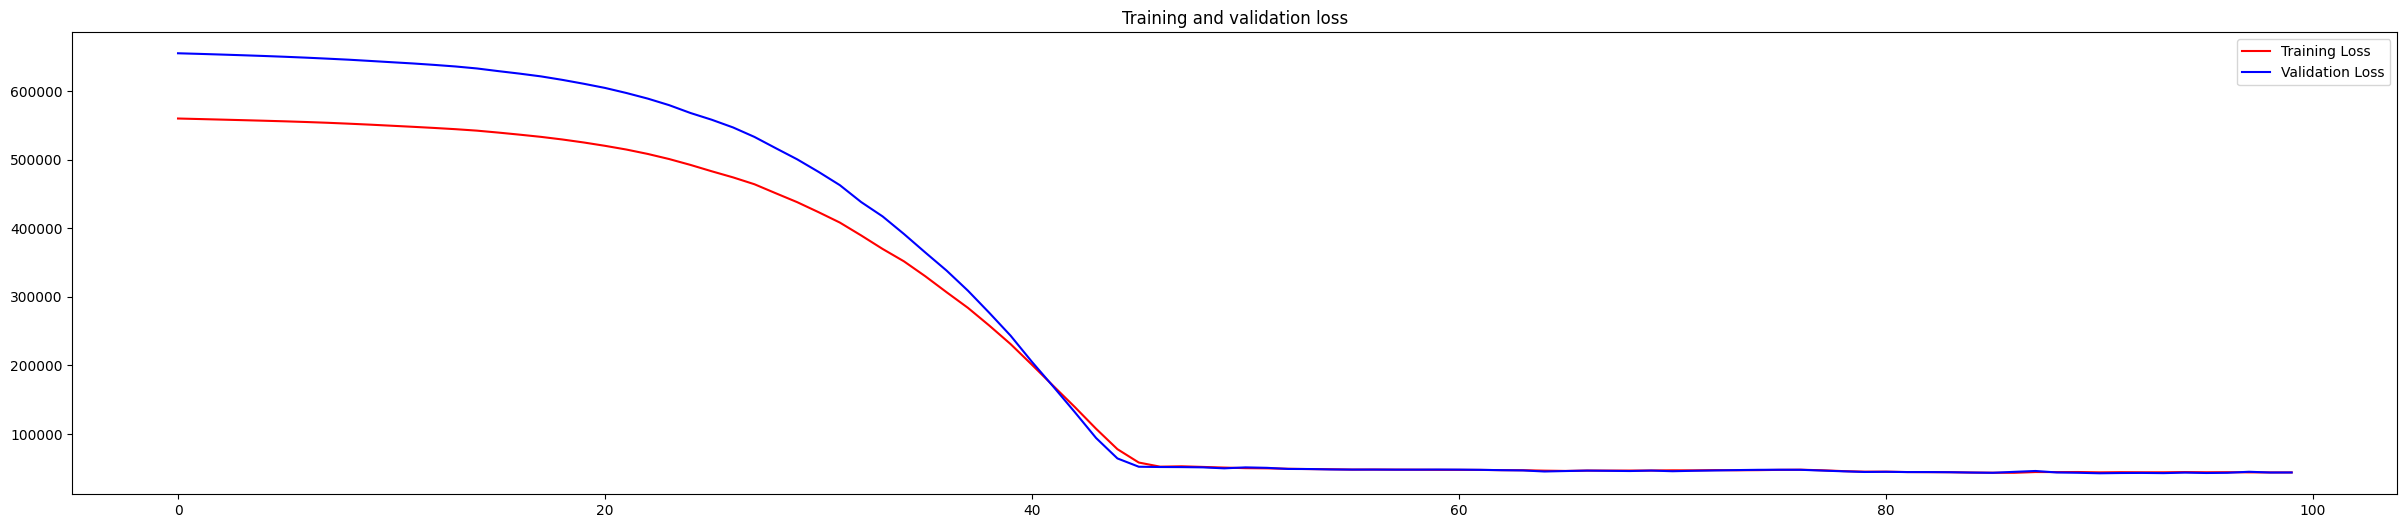

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(loss))


plt.figure(figsize=(30, 6))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Untuk mendapatkan hasil parameter evaluasi diperlukan uji model untuk membuat prediksi menggunakan data test.

Mirip seperti yang dilakukan pada saat mengevaluasi performa model tetapi kali ini dapat mengukur dengan menggunakan beberapa metrics yaitu MAE dan MSE tidak hanya satu saja

In [ ]:
# membuat prediksi
model_rnn_prediksi = model_rnn.predict(test_windows)

model_rnn_prediksi = tf.squeeze(model_rnn_prediksi)

model_rnn_prediksi

4/4 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(125,), dtype=float32, numpy=
array([670597.9 , 548303.75, 670862.4 , 672511.06, 681686.2 , 690642.25,
       680172.9 , 657810.4 , 677525.5 , 661196.5 , 673807.7 , 675496.06,
       657683.2 , 666106.1 , 658976.5 , 666376.25, 662342.8 , 647406.94,
       657075.56, 643732.25, 656875.5 , 661603.7 , 653009.9 , 708726.06,
       645245.75, 646103.8 , 669997.25, 661929.3 , 655351.4 , 663640.1 ,
       653392.3 , 651550.  , 647106.4 , 644601.06, 663788.25, 661274.56,
       667185.56, 690418.5 , 700187.3 , 705726.3 , 713554.94, 713684.25,
       700458.7 , 666836.44, 719712.5 , 620483.8 , 616896.7 , 657640.3 ,
       597216.6 , 640417.56, 629112.5 , 648032.8 , 663927.8 , 673175.7 ,
       678111.1 , 702634.56, 684484.56, 701447.4 , 702418.3 , 658665.7 ,
       684961.56, 680701.06, 648798.1 , 675252.06, 671731.4 , 656156.75,
       672346.75, 658412.3 , 661152.6 , 669565.9 , 647823.2 , 646175.75,
       629278.8 , 634374.3 , 638290.3 , 640009.44, 636314.6 , 639146.5 ,
   

In [ ]:
# mengevaluasi hasil prediksi data test window yang dihasilkan oleh model

model_rnn_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                    y_pred = model_rnn_prediksi)

model_rnn_results

{'mae': 46709.727, 'mse': 4563947500.0}

## Melakukan prediksi harga rumah dimasa depan (untuk timestamp yang melampaui data terakhir pada datesold)

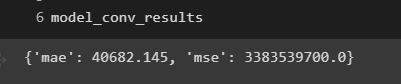

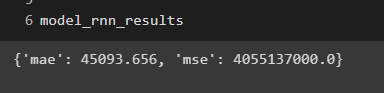

Setelah beberapa kali melakukan pelatihan didapatkan bahwa model yang menggunakan Convolution memiliki performa yang lebih baik dalam kasus kali ini, maka kita menggunakan model CNN yang lebih baik untuk memprediksi data dimasa depan atau melebihi yang terdapat pada datasets awal untuk jangka waktu tertentu dimasa depan.  

## Melatih model dengan data lampau keseluruhan untuk membuat prediksi ke masa depan

In [ ]:
house_prices_windowed.tail()

,price,bedrooms,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,Price+8
datesold,,,,,,,,,,
2019-06-30,719382.692308,3.576923,635577.777778,847070.454545,681200.000000,656103.125000,643664.893617,629853.191489,645876.000000,593384.571429
2019-07-07,570675.640000,2.990000,719382.692308,635577.777778,847070.454545,681200.000000,656103.125000,643664.893617,629853.191489,645876.000000
2019-07-14,594121.111111,2.955556,570675.640000,719382.692308,635577.777778,847070.454545,681200.000000,656103.125000,643664.893617,629853.191489
2019-07-21,608621.818182,3.090909,594121.111111,570675.640000,719382.692308,635577.777778,847070.454545,681200.000000,656103.125000,643664.893617
2019-07-28,570416.000000,2.860000,608621.818182,594121.111111,570675.640000,719382.692308,635577.777778,847070.454545,681200.000000,656103.125000


In [ ]:
# Melatih model kepada keseluruhan data di masa lalu untuk memprediksi hari-hari berikutnya

X_all = house_prices_windowed.drop(["price", "bedrooms"], axis = 1).dropna()
y_all = house_prices_windowed.dropna()['price'].to_numpy()


In [ ]:
X_all[:10], y_all[:10]

(                  Price+1       Price+2       Price+3       Price+4  \
 datesold                                                              
 2007-07-01  339500.000000  1.530000e+06  3.990000e+05  4.650000e+05   
 2007-07-08  520333.333333  3.395000e+05  1.530000e+06  3.990000e+05   
 2007-07-15  533000.000000  5.203333e+05  3.395000e+05  1.530000e+06   
 2007-07-22  603750.000000  5.330000e+05  5.203333e+05  3.395000e+05   
 2007-08-05  687714.285714  6.037500e+05  5.330000e+05  5.203333e+05   
 2007-08-12  488833.333333  6.877143e+05  6.037500e+05  5.330000e+05   
 2007-08-19  580928.571429  4.888333e+05  6.877143e+05  6.037500e+05   
 2007-08-26  707500.000000  5.809286e+05  4.888333e+05  6.877143e+05   
 2007-09-02  467600.000000  7.075000e+05  5.809286e+05  4.888333e+05   
 2007-09-09  415214.285714  4.676000e+05  7.075000e+05  5.809286e+05   
 
                  Price+5       Price+6       Price+7       Price+8  
 datesold                                                       

In [ ]:
# untuk memproses dataset menggunakan tensorflow dengan lebih cepat maka kita rubah terlebih dahulu datanya ke bentuk tensor
# 1. Merubah menjadi bentuk tensor
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. menggabungkan features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch dan prefetch
BATCH_SIZE = 32
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
# menggunakan model arsitektur CNN yang telah dibuat sebelumnya digunakan kembali dengan data keseluruhan untuk memprediksi data dimasa depan
# Perbedaan dengan arsitektur CNN sebelumnya hanyalah pada input shape, karena RNN sebelumnya mengikutsertakan atribut bedrooms sementara kali ini hanya memerhatikan price per minggunya saja

tf.random.set_seed(46)

#membuat model convolution
model_rnn_future_pred = tf.keras.Sequential([

  layers.Input(shape=(WINDOW_SIZE)),

  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=64, kernel_size=5, padding="causal", activation="relu"),
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Conv1D(filters=256, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
  ], name="model_Recurrent_Neural_Network")

model_rnn_future_pred.summary()

Model: "model_Recurrent_Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_3 (Lambda)           (None, 1, 8)              0         
                                                                 
 conv1d_6 (Conv1D)           (None, 1, 64)             2624      
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 128)            41088     
                                                                 
 conv1d_8 (Conv1D)           (None, 1, 256)            164096    
                                                                 
 dense_3 (Dense)             (None, 1, 1)              257       
                                                                 
Total params: 208,065
Trainable params: 208,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Compile model
model_rnn_future_pred.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001))

# Fit ke data harga keseluruhan tiap minggu
model_rnn_future_pred.fit(dataset_all,
            epochs=100,
            verbose=1)



Epoch 1/100
20/20 [==============================] - 3s 13ms/step - loss: 543616.8125
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 469910.1250
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 361680.9375
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 183803.2812
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 47396.6641
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 43438.4492
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 41637.8828
Epoch 8/100
20/20 [==============================] - 0s 6ms/step - loss: 41296.6328
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 41387.1172
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 41338.9688
Epoch 11/100
20/20 [==============================] - 0s 5ms/step - loss: 41341.2969
Epoch 12/100
20/20 [==============================] - 0s 5ms/step - l

## Membuat prediksi ke masa depan (data dengan time stamps setelah 2019-07-28 )

In [ ]:
house_price_df[-1:]

,postcode,price,bedrooms
datesold,,,
2019-07-28,2778.02,570416.0,2.86


In [ ]:
# jumlah timesteps minggu-minggu kedepannya yang ingin diprediksi
FUTURE_STEPS = 48 # menebak harga price 48 minggu kedepan

In [ ]:
# Fungsi untuk membuat prediksi masa depan
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:

  #list untuk nilai prediksi harga
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(into_future):

    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Prediksi pada window: \n {last_window} -> Hasil prediksi: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:

future_forecast = make_future_forecast(values=y_all,
                                       model=model_rnn_future_pred,
                                       into_future=FUTURE_STEPS,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 202ms/step
Prediksi pada window: 
 [681200.         847070.45454545 635577.77777778 719382.69230769
 570675.64       594121.11111111 608621.81818182 570416.        ] -> Hasil prediksi: 647649.25

1/1 [==============================] - 0s 21ms/step
Prediksi pada window: 
 [847070.45454545 635577.77777778 719382.69230769 570675.64
 594121.11111111 608621.81818182 570416.         647649.25      ] -> Hasil prediksi: 647292.25

1/1 [==============================] - 0s 19ms/step
Prediksi pada window: 
 [635577.77777778 719382.69230769 570675.64       594121.11111111
 608621.81818182 570416.         647649.25       647292.25      ] -> Hasil prediksi: 628082.125

1/1 [==============================] - 0s 20ms/step
Prediksi pada window: 
 [719382.69230769 570675.64       594121.11111111 608621.81818182
 570416.         647649.25       647292.25       628082.125     ] -> Hasil prediksi: 631829.5

1/1 [==============================] - 0s 19ms/step
Predi

In [ ]:
future_forecast

[647649.25,
 647292.25,
 628082.1,
 631829.5,
 614076.6,
 619684.2,
 624715.5,
 624013.0,
 634829.75,
 633744.75,
 631723.5,
 632388.1,
 631487.5,
 633732.3,
 635547.25,
 636850.56,
 638893.25,
 639428.25,
 640082.2,
 641095.56,
 642084.9,
 643424.75,
 644668.0,
 645839.7,
 647013.75,
 648029.6,
 649098.44,
 650223.4,
 651362.4,
 652535.6,
 653689.25,
 654830.56,
 655966.7,
 657091.9,
 658230.7,
 659379.56,
 660532.44,
 661689.0,
 662843.25,
 663997.06,
 665152.0,
 666308.5,
 667469.1,
 668632.9,
 669798.7,
 670966.4,
 672135.25,
 673306.0]

## future forecast

In [ ]:
def get_future_dates(start_date, into_future, offset=1):

  start_date = start_date + np.timedelta64(offset, "W") # tanggal mulai
  end_date = start_date + np.timedelta64(into_future, "W") # tanggal berakhir
  return np.arange(start_date, end_date, dtype="datetime64[W]")

In [ ]:
# timesteps paling akhir yang ada dari dataset sumber
last_timestep = house_price_df.index[-1]
last_timestep

Timestamp('2019-07-28 00:00:00')

In [ ]:
# timesteps 4 minggu kedepan dari data last_timestep
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=FUTURE_STEPS)
next_time_steps

array(['2019-08-01', '2019-08-08', '2019-08-15', '2019-08-22',
       '2019-08-29', '2019-09-05', '2019-09-12', '2019-09-19',
       '2019-09-26', '2019-10-03', '2019-10-10', '2019-10-17',
       '2019-10-24', '2019-10-31', '2019-11-07', '2019-11-14',
       '2019-11-21', '2019-11-28', '2019-12-05', '2019-12-12',
       '2019-12-19', '2019-12-26', '2020-01-02', '2020-01-09',
       '2020-01-16', '2020-01-23', '2020-01-30', '2020-02-06',
       '2020-02-13', '2020-02-20', '2020-02-27', '2020-03-05',
       '2020-03-12', '2020-03-19', '2020-03-26', '2020-04-02',
       '2020-04-09', '2020-04-16', '2020-04-23', '2020-04-30',
       '2020-05-07', '2020-05-14', '2020-05-21', '2020-05-28',
       '2020-06-04', '2020-06-11', '2020-06-18', '2020-06-25'],
      dtype='datetime64[W]')

Hasil prediksi

In [ ]:
for x in range(len(next_time_steps)):
  print("Untuk house price di tanggal {date} adalah {price}".format(date = next_time_steps[x], price = future_forecast[x]))

Untuk house price di tanggal 2019-08-01 adalah 647649.25
Untuk house price di tanggal 2019-08-08 adalah 647292.25
Untuk house price di tanggal 2019-08-15 adalah 628082.125
Untuk house price di tanggal 2019-08-22 adalah 631829.5
Untuk house price di tanggal 2019-08-29 adalah 614076.625
Untuk house price di tanggal 2019-09-05 adalah 619684.1875
Untuk house price di tanggal 2019-09-12 adalah 624715.5
Untuk house price di tanggal 2019-09-19 adalah 624013.0
Untuk house price di tanggal 2019-09-26 adalah 634829.75
Untuk house price di tanggal 2019-10-03 adalah 633744.75
Untuk house price di tanggal 2019-10-10 adalah 631723.5
Untuk house price di tanggal 2019-10-17 adalah 632388.125
Untuk house price di tanggal 2019-10-24 adalah 631487.5
Untuk house price di tanggal 2019-10-31 adalah 633732.3125
Untuk house price di tanggal 2019-11-07 adalah 635547.25
Untuk house price di tanggal 2019-11-14 adalah 636850.5625
Untuk house price di tanggal 2019-11-21 adalah 638893.25
Untuk house price di tangga

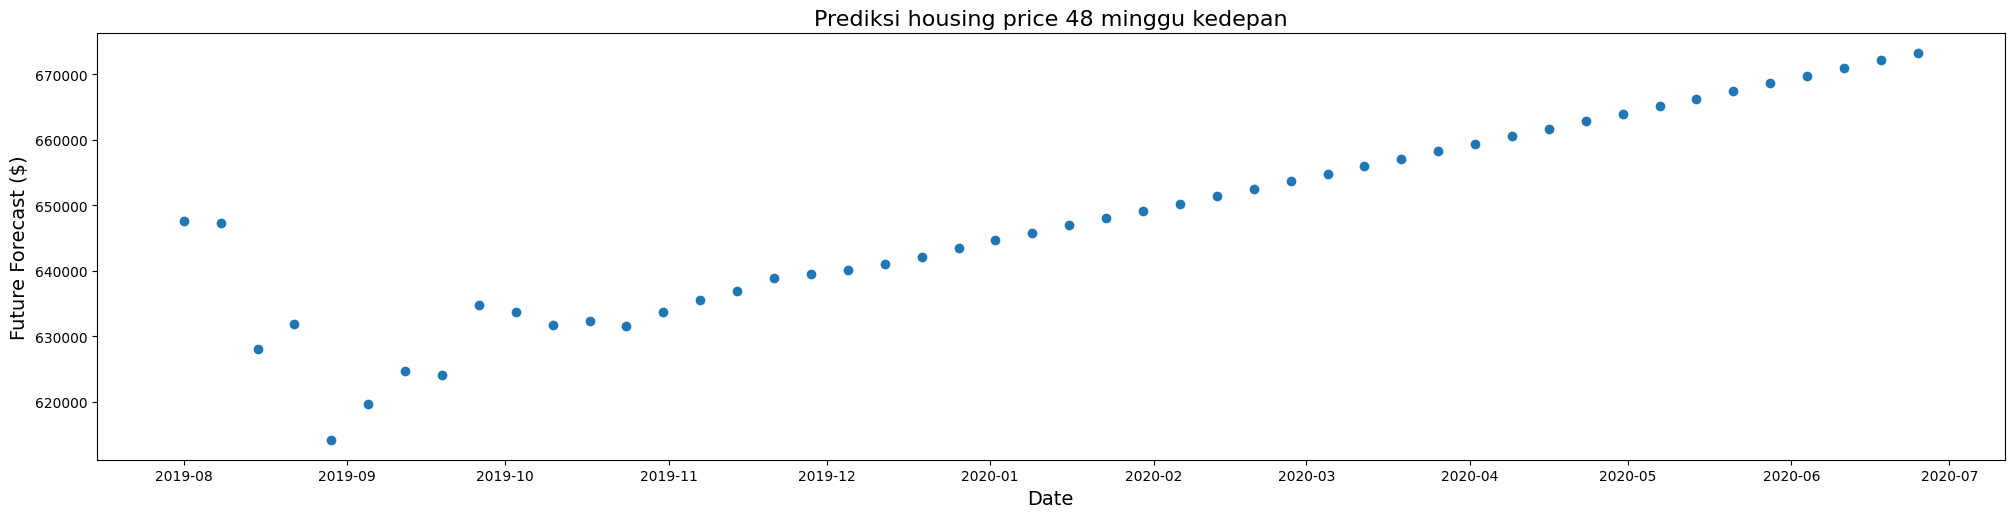

In [ ]:
plt.figure().set_figwidth(20)
plt.plot_date(next_time_steps, future_forecast)
plt.tight_layout()
plt.title('Prediksi housing price 48 minggu kedepan', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Future Forecast ($)', fontsize=14)
plt.show()